# MNIST data  


In [2]:
import os
import struct
import numpy as np

#utility function to read data

def load_mnist(path, Type = 'train'):
    #construct paths, 
    #two train datas are train-images-idx3-ubyte, train-labels-idx1-ubyte
    #two test datas are t10k-images-idx3-ubyte, t10k-labels-idx1-ubyte
    label_path = os.path.join(path, '%s-labels-idx1-ubyte' % Type)
    
    image_path = os.path.join(path, '%s-images-idx3-ubyte' % Type)
    
    with open(label_path, 'rb') as l_path:
        m, n = struct.unpack('>II', l_path.read(8))
        label = np.fromfile(l_path, dtype = np.uint8)
        
    with open(image_path, 'rb') as i_path:
        m,n, rows, cols = struct.unpack('>IIII', i_path.read(16))
        image = np.fromfile(i_path, dtype = np.uint8).reshape(len(label), 784)
    return image, label
    
    

In [21]:
X_train, y_train = load_mnist('/Users/chihchichou/Documents/CS/Machine_Learning/ML/Neural_Network/data')
X_test, y_test = load_mnist('/Users/chihchichou/Documents/CS/Machine_Learning/ML/Neural_Network/data', Type = 'test')
X_train.shape


(60000, 784)

Populating the interactive namespace from numpy and matplotlib


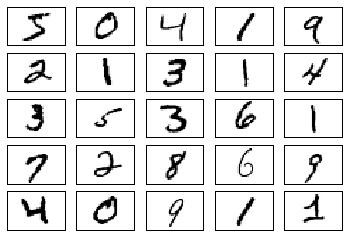

In [21]:
#lets take a look of some examples of pictures

import matplotlib.pyplot as plt
%pylab inline
fig, ax = plt.subplots(nrows = 5, ncols = 5, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(25):
    #img = X_train[y_train == 0][i].reshape(28,28)
    img = X_train[i].reshape(28,28)
    ax[i].imshow(img, cmap = 'Greys', interpolation = 'nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])


plt.show()

In [12]:
#train on the whole training set
import NNet
#(n_features, n_hidden, n_output, iters = 100,minibatch = 1, eta = 0.01)
nnet = NNet.NNet(784, 50, 10, minibatch = 50, eta = 0.001)
nnet.fit(X_train, y_train)

In [18]:
#compute the indat error
pred_y = nnet.predict(X_train)
acc = (float(np.sum(pred_y == y_train))/y_train.shape[0])
print 'Training accuracy : %.2f%%' %(acc*100)


Training accuracy : 88.77%


In [22]:
#make prediction
pred_y = nnet.predict(X_test)
acc = (float(np.sum(pred_y == y_test))/y_test.shape[0])
print 'Prediction accuracy : %.2f%%' %(acc*100)

Prediction accuracy : 88.97%
